# Clustering intro

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
df=pd.read_csv(r'C:\Users\eldiy\Documents\Ironhack\May\Week8\BreadBasket_DMS.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
Date           21293 non-null object
Time           21293 non-null object
Transaction    21293 non-null int64
Item           21293 non-null object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


In [4]:
df.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


# Data Preparation

In [5]:
df['datetime']=pd.to_datetime(df.Date+' '+df.Time)

In [6]:
df.head()

,Date,Time,Transaction,Item,datetime
0,2016-10-30,09:58:11,1,Bread,2016-10-30 09:58:11
1,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34
2,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34
3,2016-10-30,10:07:57,3,Hot chocolate,2016-10-30 10:07:57
4,2016-10-30,10:07:57,3,Jam,2016-10-30 10:07:57


In [7]:
df.Item.nunique()

95

In [8]:
df.Item.value_counts()

Coffee          5471
Bread           3325
Tea             1435
Cake            1025
Pastry           856
                ... 
Gift voucher       1
Chicken sand       1
Adjustment         1
The BART           1
Bacon              1
Name: Item, Length: 95, dtype: int64

In [9]:
beverage = ['Hot chocolate', 'Coffee', 'Tea', 'Mineral water', 'Juice', 'Coke', 'Smoothies']
other = ['NONE', 'Christmas common', 'Gift voucher', "Valentine's card", 'Tshirt', 'Afternoon with the baker', 'Postcard', 'Siblings', 'Nomad bag', 'Adjustment', 'Drinking chocolate spoons ', 'Coffee granules ']
kids = ["Ella's Kitchen Pouches", 'My-5 Fruit Shoot', 'Kids biscuit']
snacks = ['Mighty Protein', 'Pick and Mix Bowls', 'Caramel bites', 'Bare Popcorn', 'Crisps', 'Cherry me Dried fruit', 'Raw bars']
bread = ['Bread', 'Toast', 'Baguette', 'Focaccia', 'Scandinavian']
breakfast_pastry = ['Muffin', 'Pastry', 'Medialuna', 'Scone']
dessert = ['Cookies', 'Tartine', 'Fudge', 'Victorian Sponge', 'Cake', 'Alfajores', 'Brownie', 'Bread Pudding', 'Bakewell', 'Raspberry shortbread sandwich', 'Lemon and coconut', 'Crepes', 'Chocolates', 'Truffles', 'Panatone']
condiments = ['Jam', 'Dulce de Leche', 'Honey', 'Gingerbread syrup', 'Extra Salami or Feta', 'Bacon', 'Spread', 'Chimichurri Oil']
breakfast = ['Eggs', 'Frittata', 'Granola', 'Muesli', 'Duck egg', 'Brioche and salami']
lunch = ['Soup', 'Sandwich', 'Chicken sand', 'Salad', 'Chicken Stew']
other_food = [x for x in df.Item.unique() if x not in beverage 
                and x not in other and x not in kids and x not in snacks 
                and x not in bread and x not in breakfast_pastry 
                and x not in dessert and x not in condiments 
                and x not in breakfast and x not in lunch]

In [10]:
df['beverage']=np.where(df.Item.isin(beverage),1,0)
df['other']=np.where(df.Item.isin(other),1,0)
df['kids']=np.where(df.Item.isin(kids),1,0)
df['snacks']=np.where(df.Item.isin(snacks),1,0)
df['bread']=np.where(df.Item.isin(bread),1,0)
df['breakfast_pastry']=np.where(df.Item.isin(breakfast_pastry),1,0)
df['breakfast']=np.where(df.Item.isin(breakfast),1,0)
df['dessert']=np.where(df.Item.isin(dessert),1,0)
df['condiments']=np.where(df.Item.isin(condiments),1,0)
df['lunch']=np.where(df.Item.isin(lunch),1,0)
df['other_food']=np.where(df.Item.isin(other_food),1,0)

In [11]:
df.head()

,Date,Time,Transaction,Item,datetime,beverage,other,kids,snacks,bread,breakfast_pastry,breakfast,dessert,condiments,lunch,other_food
0,2016-10-30,09:58:11,1,Bread,2016-10-30 09:58:11,0,0,0,0,1,0,0,0,0,0,0
1,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,0,0,0,0,1,0,0,0,0,0,0
2,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,0,0,0,0,1,0,0,0,0,0,0
3,2016-10-30,10:07:57,3,Hot chocolate,2016-10-30 10:07:57,1,0,0,0,0,0,0,0,0,0,0
4,2016-10-30,10:07:57,3,Jam,2016-10-30 10:07:57,0,0,0,0,0,0,0,0,1,0,0


In [12]:
df_group=df.groupby(['Transaction','datetime']).sum().reset_index(level='datetime')

In [14]:
df_group.head()

,datetime,beverage,other,kids,snacks,bread,breakfast_pastry,breakfast,dessert,condiments,lunch,other_food
Transaction,,,,,,,,,,,,
1,2016-10-30 09:58:11,0,0,0,0,1,0,0,0,0,0,0
2,2016-10-30 10:05:34,0,0,0,0,2,0,0,0,0,0,0
3,2016-10-30 10:07:57,1,0,0,0,0,0,0,1,1,0,0
4,2016-10-30 10:08:41,0,0,0,0,0,1,0,0,0,0,0
5,2016-10-30 10:13:03,1,0,0,0,1,1,0,0,0,0,0


In [15]:
df_group['hour']=df_group.datetime.dt.hour
df_group['day']=df_group.datetime.dt.day_name()

In [16]:
df_group.day.value_counts()

Saturday     2068
Friday       1488
Sunday       1264
Thursday     1252
Tuesday      1203
Monday       1135
Wednesday    1121
Name: day, dtype: int64

In [17]:
df_group.hour.value_counts()

11    1445
12    1347
10    1267
13    1163
14    1130
9     1007
15     924
16     583
8      375
17     160
18      52
19      34
7       16
20      15
22       7
23       3
21       2
1        1
Name: hour, dtype: int64

In [18]:
df_group.head()

,datetime,beverage,other,kids,snacks,bread,breakfast_pastry,breakfast,dessert,condiments,lunch,other_food,hour,day
Transaction,,,,,,,,,,,,,,
1,2016-10-30 09:58:11,0,0,0,0,1,0,0,0,0,0,0,9,Sunday
2,2016-10-30 10:05:34,0,0,0,0,2,0,0,0,0,0,0,10,Sunday
3,2016-10-30 10:07:57,1,0,0,0,0,0,0,1,1,0,0,10,Sunday
4,2016-10-30 10:08:41,0,0,0,0,0,1,0,0,0,0,0,10,Sunday
5,2016-10-30 10:13:03,1,0,0,0,1,1,0,0,0,0,0,10,Sunday


In [19]:
df_ml=df_group.drop('datetime',axis=1)

In [20]:
df_ml=pd.get_dummies(data=df_ml,columns=['day'])

In [21]:
df_ml.head()

,beverage,other,kids,snacks,bread,breakfast_pastry,breakfast,dessert,condiments,lunch,other_food,hour,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
Transaction,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,1,0,0,0,0,0,0,9,0,0,0,1,0,0,0
2,0,0,0,0,2,0,0,0,0,0,0,10,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,1,1,0,0,10,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,10,0,0,0,1,0,0,0
5,1,0,0,0,1,1,0,0,0,0,0,10,0,0,0,1,0,0,0


# PCA

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca=PCA(4)

In [24]:
pca.fit(df_ml)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [25]:
pca.explained_variance_ratio_[:4]

array([0.66988786, 0.08781839, 0.03398601, 0.0336184 ])

In [26]:
pca_df=pd.DataFrame(pca.transform(df_ml),columns=['pca1','pca2','pca3','pca4'])

In [27]:
pca_df.head()

,pca1,pca2,pca3,pca4
0,3.197413,-0.926669,0.244937,0.005977
1,2.227896,-1.274346,1.183373,-0.159237
2,2.107647,0.424883,-0.219833,0.879815
3,2.198960,-0.580674,-0.783349,-0.031003
4,2.206812,0.037385,0.443748,-0.333646


In [28]:
pd.DataFrame(pca.components_)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.020363,-0.002044,-0.001013,-0.001014,0.028215,0.027494,-0.001030,-0.043698,0.000241,-0.024630,-0.003204,-0.997732,0.004360,0.001050,-0.002734,-0.000066,-0.000206,-0.001230,-0.001174
1,0.931432,0.027998,0.000297,0.004737,-0.313372,0.066927,0.002591,0.145639,-0.004586,0.073535,0.014384,-0.034304,-0.005995,0.005792,-0.019441,0.021069,-0.004556,0.001493,0.001638
2,0.299162,-0.017688,-0.001454,0.000133,0.927935,-0.110853,0.004330,0.158366,-0.004865,-0.012922,-0.064613,0.010502,-0.010005,-0.038870,0.058359,0.026240,0.000700,-0.039338,0.002915
3,-0.181524,-0.044359,0.002917,0.000822,-0.121119,-0.114003,-0.004659,0.965386,0.012954,-0.036255,0.000899,-0.044096,0.005496,-0.020597,-0.016917,0.025880,0.020744,-0.002839,-0.011767


In [29]:
df_ml.head(1)

,beverage,other,kids,snacks,bread,breakfast_pastry,breakfast,dessert,condiments,lunch,other_food,hour,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
Transaction,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,1,0,0,0,0,0,0,9,0,0,0,1,0,0,0


# Clustering

In [30]:
from sklearn.cluster import KMeans

I just know that we need 5 clusters. 

In [31]:
kmeans=KMeans(5)

In [32]:
df_clusters=kmeans.fit(pca_df)

In [33]:
df_clusters.cluster_centers_

array([[-3.07237949e-01, -2.62397222e-02, -3.66405471e-02,
        -1.44835479e-02],
       [-4.42371509e+00, -8.64897890e-02,  1.99165497e-02,
        -1.07061572e-02],
       [ 3.46747051e+00, -5.43764954e-02, -3.01346978e-02,
        -3.01309416e-03],
       [ 1.63146200e+00,  5.06637967e-02,  2.89305789e-02,
         7.19916328e-03],
       [-2.29584237e+00,  3.82205463e-02,  1.87743447e-02,
         1.46933723e-02]])

In [34]:
df_ml['clusters']=df_clusters.fit_predict(pca_df)

In [35]:
df_ml.clusters.value_counts()

1    2749
2    2666
4    1802
0    1510
3     804
Name: clusters, dtype: int64

In [36]:
df_ml.head()

,beverage,other,kids,snacks,bread,breakfast_pastry,breakfast,dessert,condiments,lunch,other_food,hour,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,clusters
Transaction,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,1,0,0,0,0,0,0,9,0,0,0,1,0,0,0,2
2,0,0,0,0,2,0,0,0,0,0,0,10,0,0,0,1,0,0,0,2
3,1,0,0,0,0,0,0,1,1,0,0,10,0,0,0,1,0,0,0,2
4,0,0,0,0,0,1,0,0,0,0,0,10,0,0,0,1,0,0,0,2
5,1,0,0,0,1,1,0,0,0,0,0,10,0,0,0,1,0,0,0,2


In [37]:
df_ml.reset_index(inplace=True)

In [39]:
df_merged=pd.merge(df,df_ml[['Transaction','clusters']], on='Transaction', how='outer')

In [40]:
df_merged.head()

,Date,Time,Transaction,Item,datetime,beverage,other,kids,snacks,bread,breakfast_pastry,breakfast,dessert,condiments,lunch,other_food,clusters
0,2016-10-30,09:58:11,1,Bread,2016-10-30 09:58:11,0,0,0,0,1,0,0,0,0,0,0,2
1,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,0,0,0,0,1,0,0,0,0,0,0,2
2,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,0,0,0,0,1,0,0,0,0,0,0,2
3,2016-10-30,10:07:57,3,Hot chocolate,2016-10-30 10:07:57,1,0,0,0,0,0,0,0,0,0,0,2
4,2016-10-30,10:07:57,3,Jam,2016-10-30 10:07:57,0,0,0,0,0,0,0,0,1,0,0,2


In [41]:
df_merged.clusters.value_counts()

1    5997
2    5503
4    3509
3    3305
0    2979
Name: clusters, dtype: int64

In [42]:
pd.crosstab(df_ml.hour,df_ml.clusters)

clusters,0,1,2,3,4
hour,,,,,
1,0,0,1,0,0
7,0,0,16,0,0
8,0,0,375,0,0
9,0,0,1007,0,0
10,0,0,1267,0,0
11,0,1443,0,2,0
12,0,1306,0,41,0
13,0,0,0,230,933
14,0,0,0,261,869


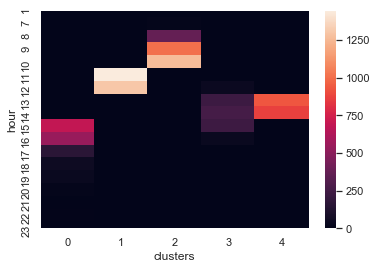

In [43]:
sns.heatmap(pd.crosstab(df_ml.hour,df_ml.clusters))

In [44]:
pd.crosstab(df_group.day,df_ml.clusters)

clusters,0,1,2,3,4
day,,,,,
Friday,226,448,378,135,281
Monday,200,290,358,88,199
Saturday,346,592,451,207,379
Sunday,174,373,333,107,245
Thursday,177,362,423,59,231
Tuesday,182,365,337,100,219
Wednesday,187,265,351,90,228


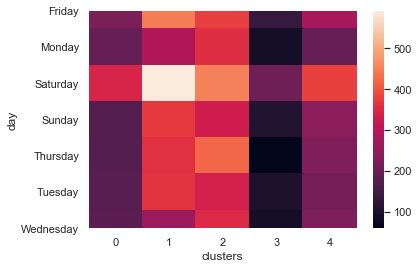

In [45]:
sns.heatmap(pd.crosstab(df_group.day,df_ml.clusters))

In [46]:
a=df_merged.groupby('clusters').Item.value_counts()
b=a.to_frame('counts').reset_index()

In [48]:
b.set_index('Item',inplace=True)

In [49]:
b.groupby('clusters').counts.nlargest(5)

clusters  Item         
0         Coffee            587
          Bread             492
          Tea               261
          Cake              249
          Cookies           120
1         Coffee           1606
          Bread             996
          Tea               337
          NONE              270
          Cake              247
2         Coffee           1615
          Bread            1082
          Pastry            453
          Medialuna         294
          Tea               280
3         Coffee           1038
          Tea               362
          Cake              207
          Sandwich          188
          Hot chocolate     183
4         Coffee            625
          Bread             603
          Sandwich          263
          Tea               195
          Cake              191
Name: counts, dtype: int64

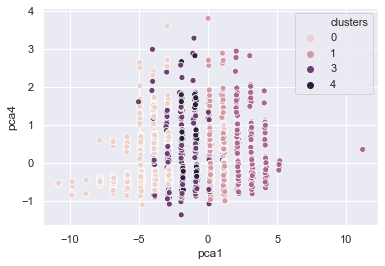

In [50]:
sns.scatterplot(x='pca1',y='pca4',data=pca_df, hue=df_ml.clusters)

C:\Users\eldiy\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\eldiy\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


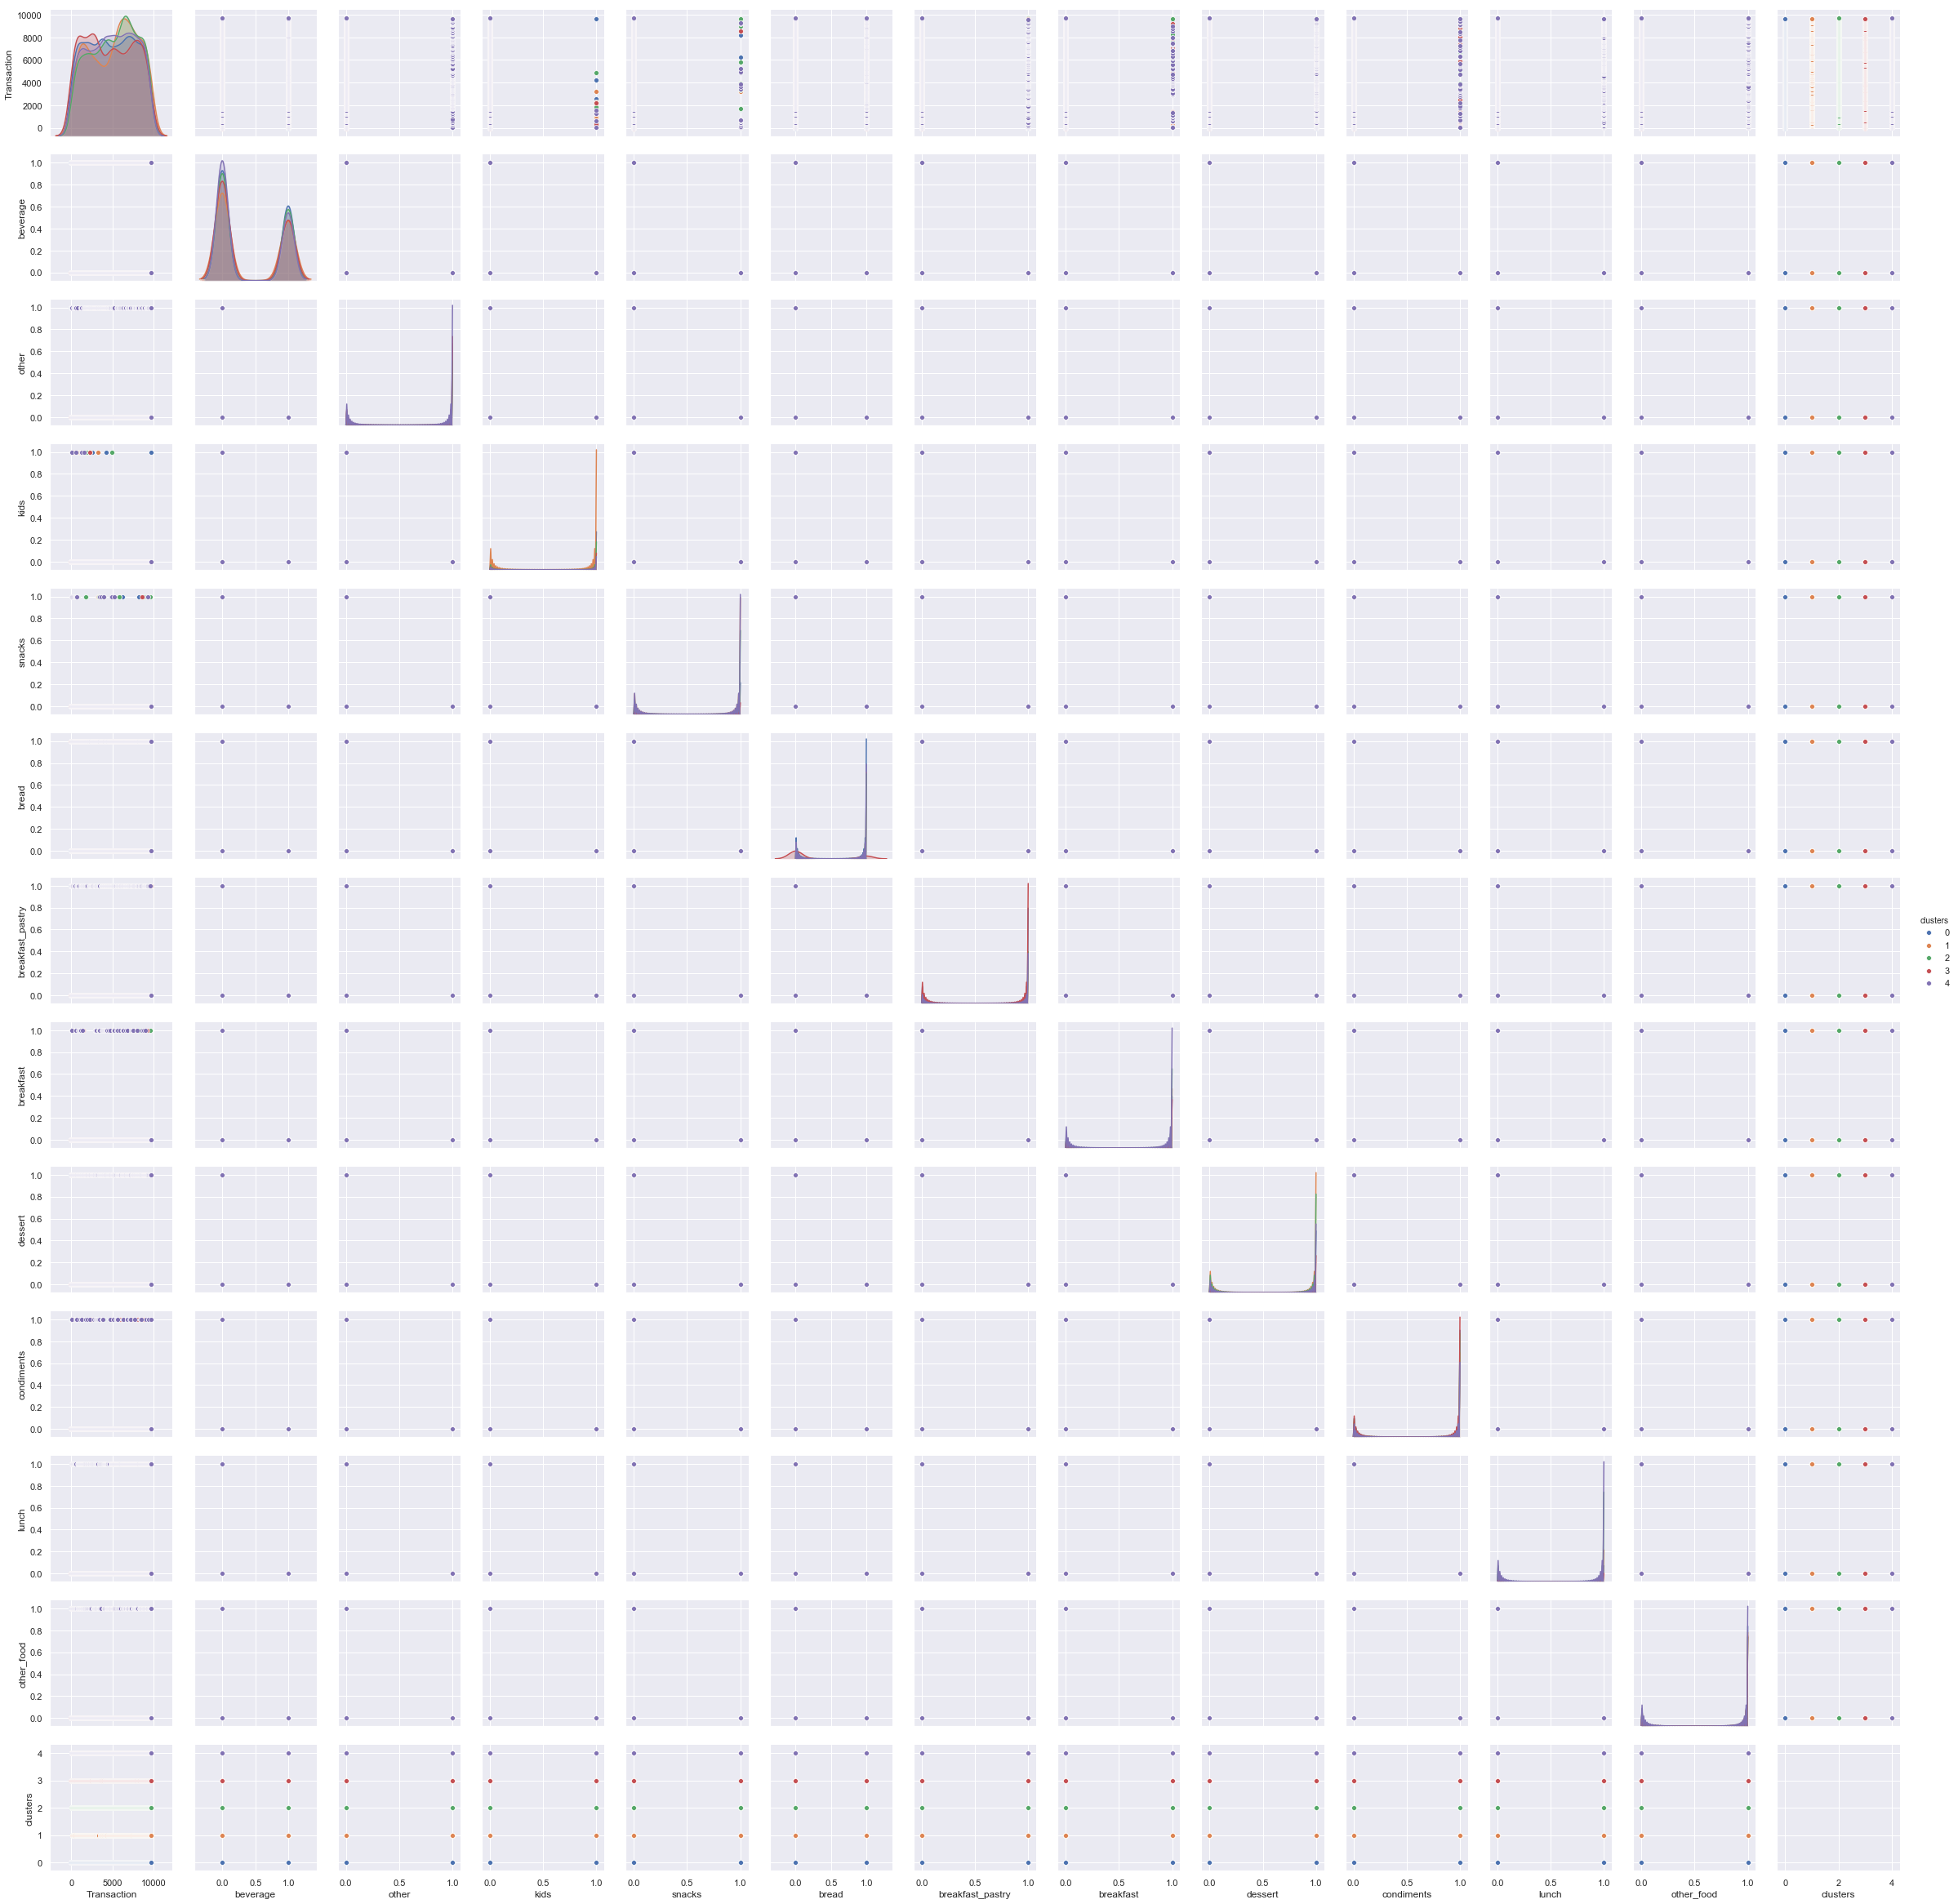

In [112]:
sns.pairplot(df_merged, hue='clusters')

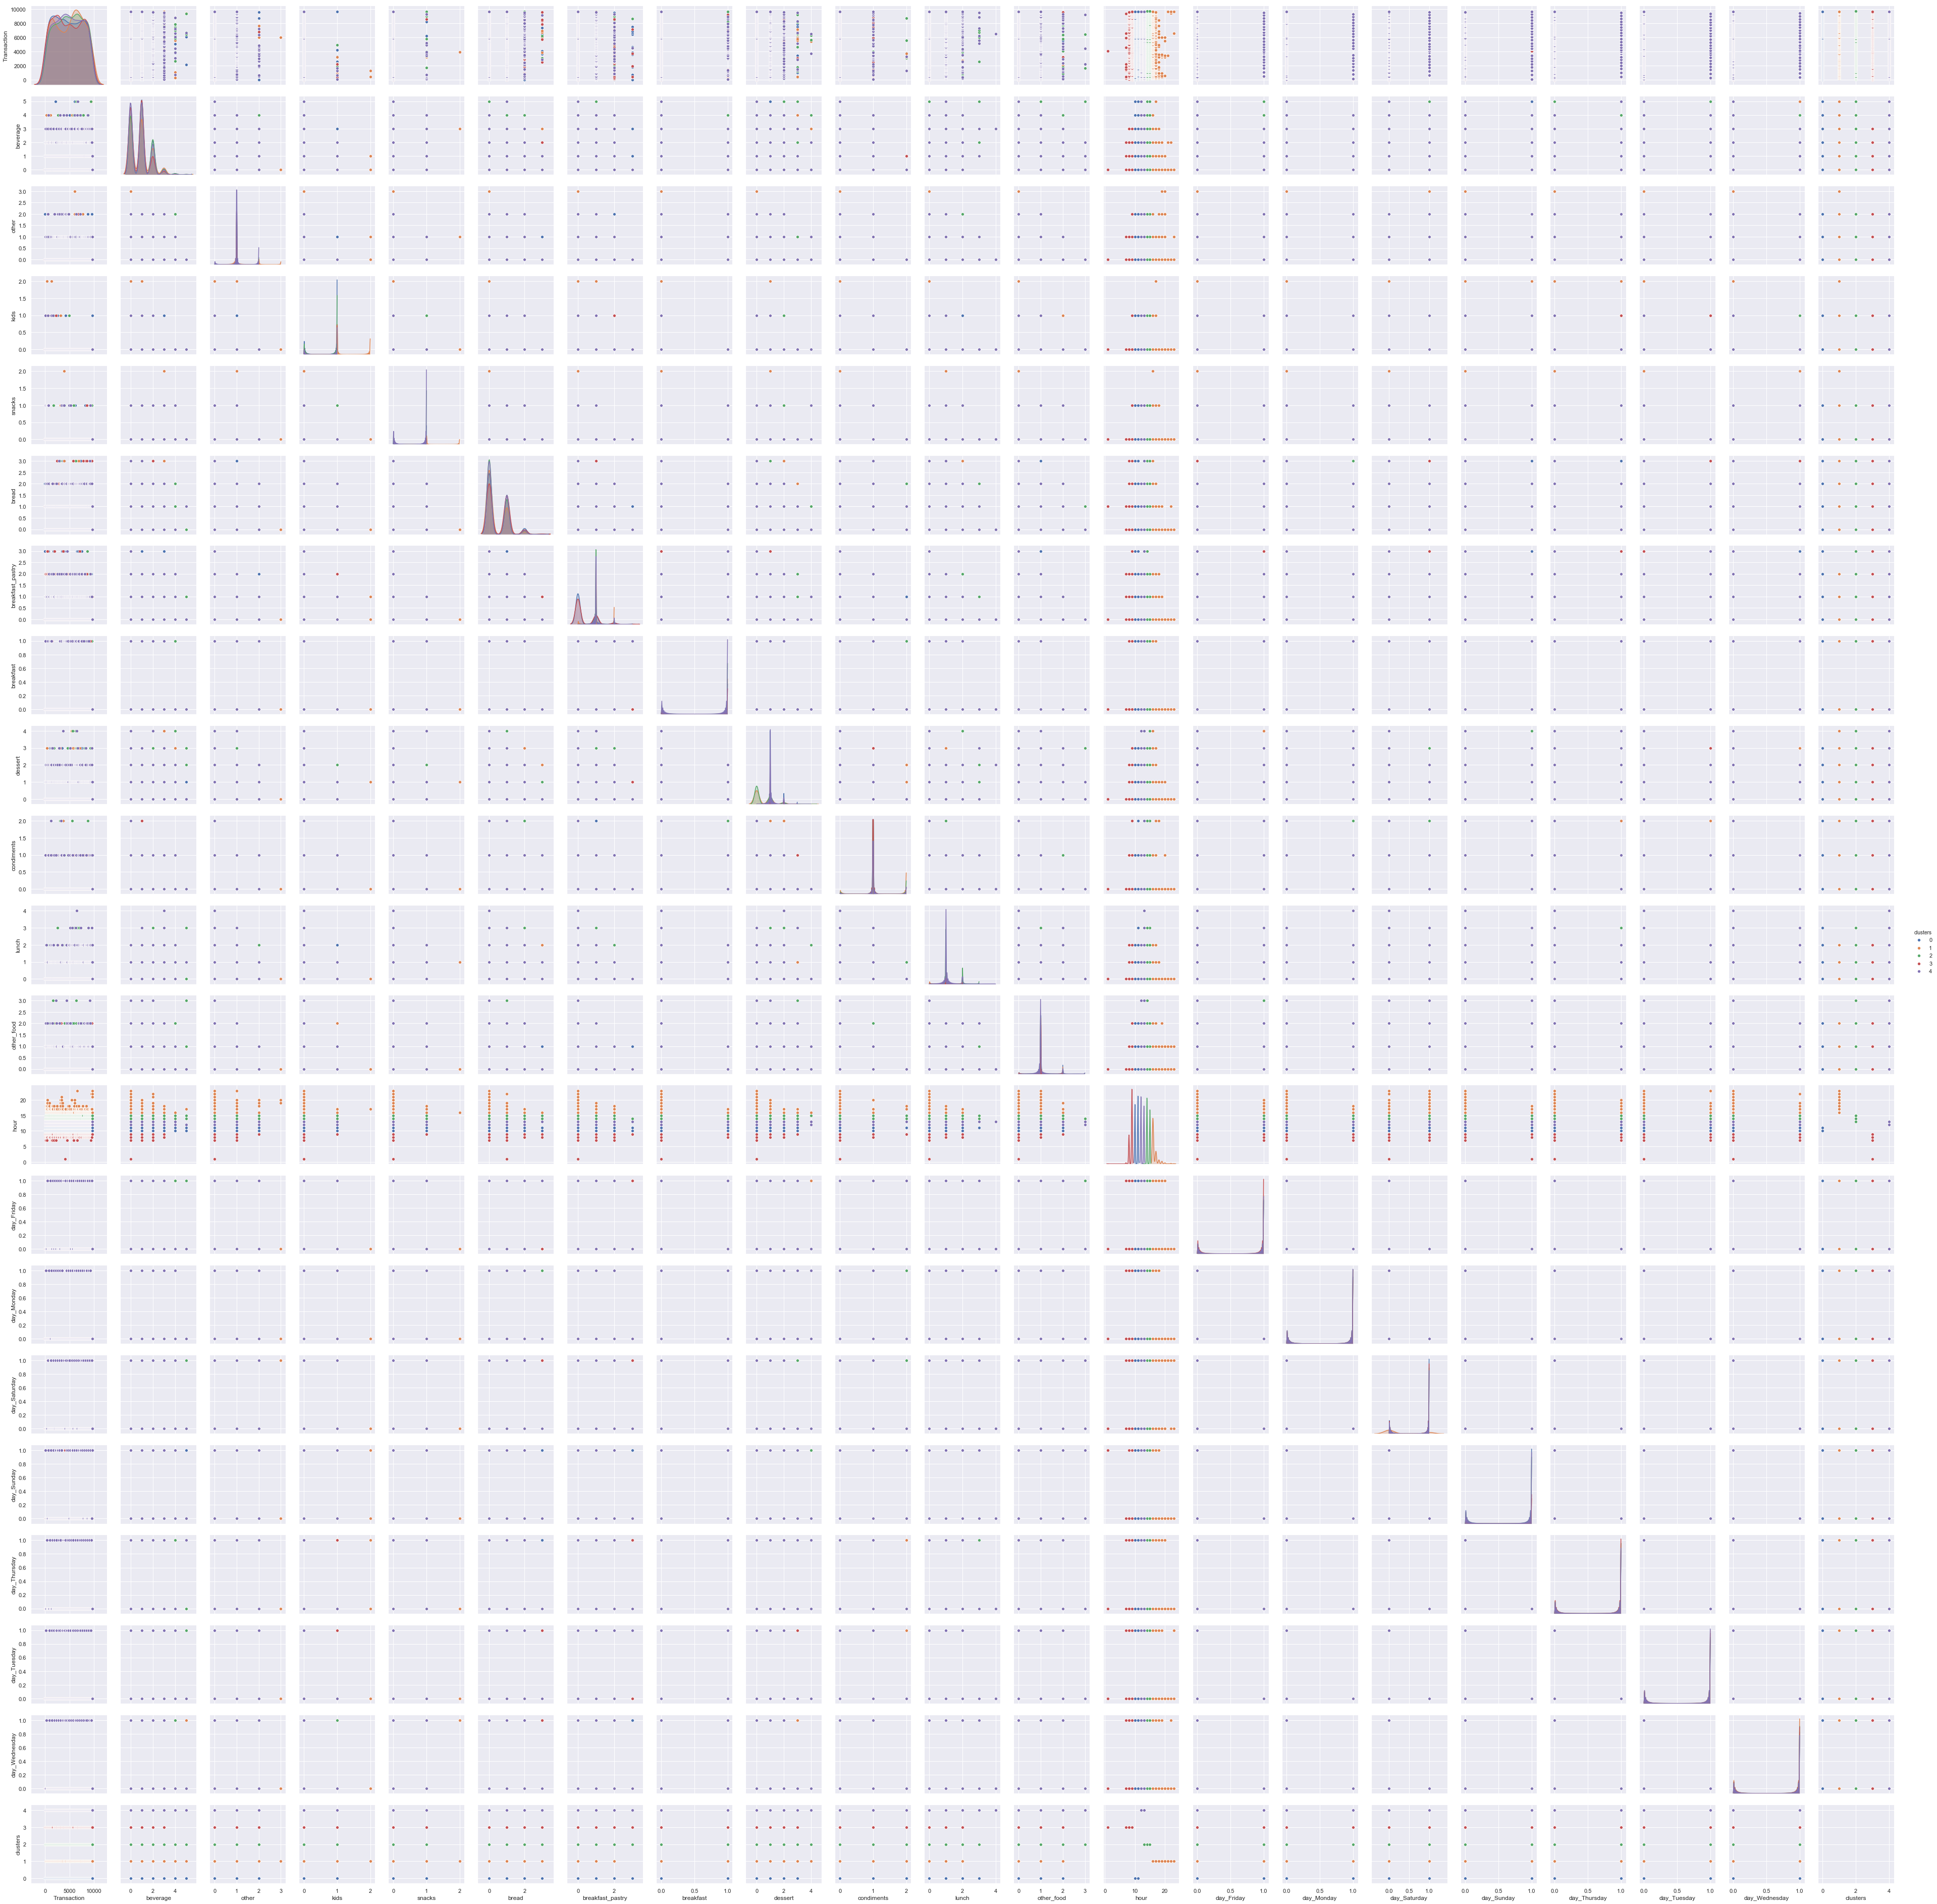

In [113]:
sns.pairplot(df_ml, hue='clusters')

In [51]:
df.head()

,Date,Time,Transaction,Item,datetime,beverage,other,kids,snacks,bread,breakfast_pastry,breakfast,dessert,condiments,lunch,other_food
0,2016-10-30,09:58:11,1,Bread,2016-10-30 09:58:11,0,0,0,0,1,0,0,0,0,0,0
1,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,0,0,0,0,1,0,0,0,0,0,0
2,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,0,0,0,0,1,0,0,0,0,0,0
3,2016-10-30,10:07:57,3,Hot chocolate,2016-10-30 10:07:57,1,0,0,0,0,0,0,0,0,0,0
4,2016-10-30,10:07:57,3,Jam,2016-10-30 10:07:57,0,0,0,0,0,0,0,0,1,0,0


# Now let's play on other data and test different measurements

In [52]:
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [53]:
n_samples=1500
X,y = datasets.make_moons(n_samples=n_samples, noise=0.1)
X=StandardScaler().fit_transform(X)

In [54]:
single=cluster.AgglomerativeClustering(n_clusters=2, linkage='single')
kmeans=cluster.KMeans(n_clusters=2)

In [55]:
single.fit(X);
kmeans.fit(X);

In [56]:
y1_pred=single.labels_.astype(np.int)
y2_pred=kmeans.predict(X)

Model 1 Silhouette Score: -0.08471986919927961
Model 2 Silhouette Score: 0.4910131292712937
Model 1 davies_bouldin_score: 1.2354789188460533
Model 2 davies_bouldin_score: 0.8131893529403913


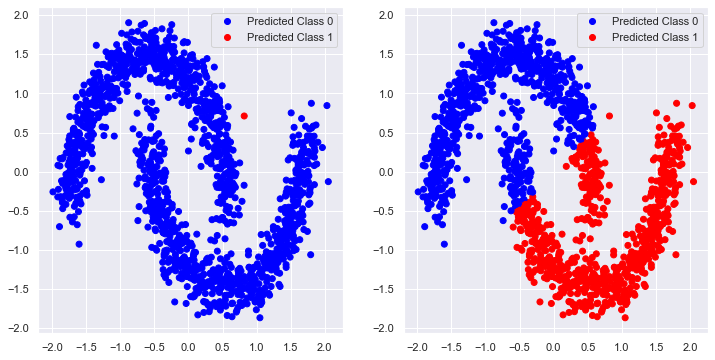

In [57]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
colors = np.array(['blue', 'red'])
legend_elems = [Line2D([0], [0], color=color, marker='o', linestyle='', label="Predicted Class {}".format(i))
                for i, color in enumerate(colors)]
ax[0].scatter(X[:, 0], X[:, 1], color=colors[y1_pred])
ax[0].legend(handles=legend_elems, loc='upper right')
ax[1].scatter(X[:, 0], X[:, 1], color=colors[y2_pred])
ax[1].legend(handles=legend_elems, loc='upper right')

print("Model 1 Silhouette Score: {}".format(silhouette_score(X, y1_pred)))
print("Model 2 Silhouette Score: {}".format(silhouette_score(X, y2_pred)))
print("Model 1 davies_bouldin_score: {}".format(davies_bouldin_score(X, y1_pred)))
print("Model 2 davies_bouldin_score: {}".format(davies_bouldin_score(X, y2_pred)))

In [58]:
from yellowbrick.cluster import KElbowVisualizer

In [59]:
model=KMeans()

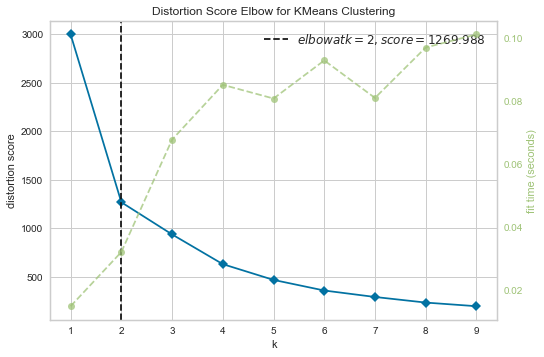

In [60]:
vizualiser=KElbowVisualizer(model,k=(1,10))
vizualiser.fit(X)
vizualiser.poof()

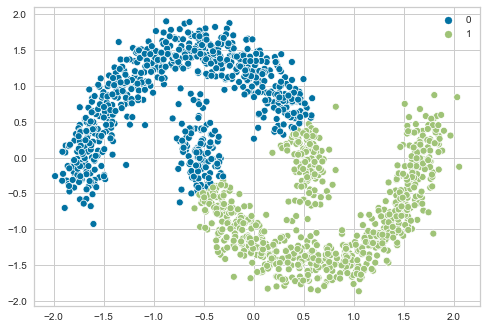

In [61]:
sns.scatterplot(X[:,0],X[:,1], hue=y2_pred)

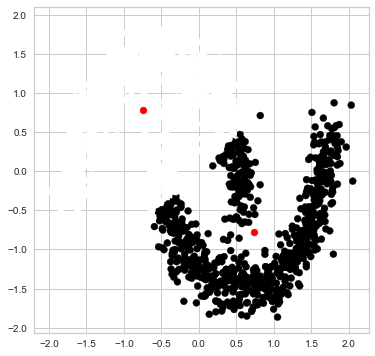

In [62]:
plt.figure(figsize=(6,6))
plt.scatter(X[:,0],X[:,1], c=y2_pred)

centers=kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1], c='red')

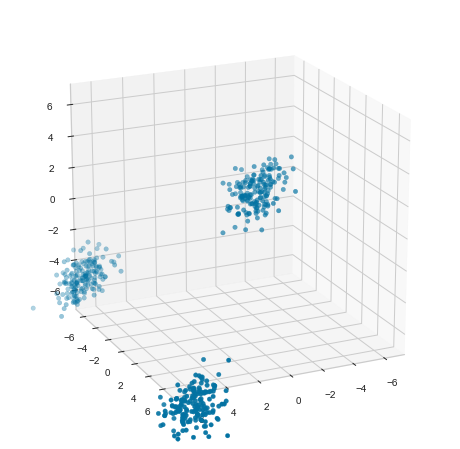

In [63]:
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.transform import Rotation as R

X, _ = make_blobs(n_samples=500, n_features=2, centers=3, cluster_std=1.0)

X = np.c_[X, 0.5 * np.random.randn(X.shape[0], 1)]

rot = R.from_euler('y', 45, degrees=True)
X = rot.apply(X)

fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2])
ax.set_xlim(-7, 7)
ax.set_ylim(-7, 7)
ax.set_zlim(-7, 7)

ax.view_init(elev=20, azim=65)
plt.show()


pca=PCA()
pca.fit(X)
pca_X=pca.transform(X)

In [64]:
pca_X

array([[-1.64439097,  8.55983103, -0.0221298 ],
       [-7.93786554, -4.89610591,  0.25230272],
       [-7.88186235, -4.34014927,  0.44018265],
       ...,
       [11.42353476, -3.34030035, -0.87465195],
       [-1.31058681,  5.64655648,  0.50435292],
       [-0.36665116,  6.86920481,  0.06382126]])

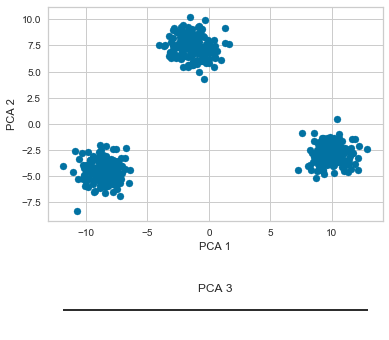

In [65]:
fig = plt.figure(figsize=(6, 6))
ax = [plt.subplot2grid((6, 1), (0, 0), rowspan=4), plt.subplot2grid((6, 1), (5, 0))]

ax[0].scatter(pca_X[:, 0], pca_X[:, 1])
ax[0].set_xlabel("PCA 1")
ax[0].set_ylabel("PCA 2")

ax[1].set_title('PCA 3', pad=-5)
ax[1].hlines(1, -7, 10)
y = np.ones(X.shape[0])
ax[1].plot(pca_X[:, 2], y, '|', ms='20')
ax[1].axis('off')

plt.show()

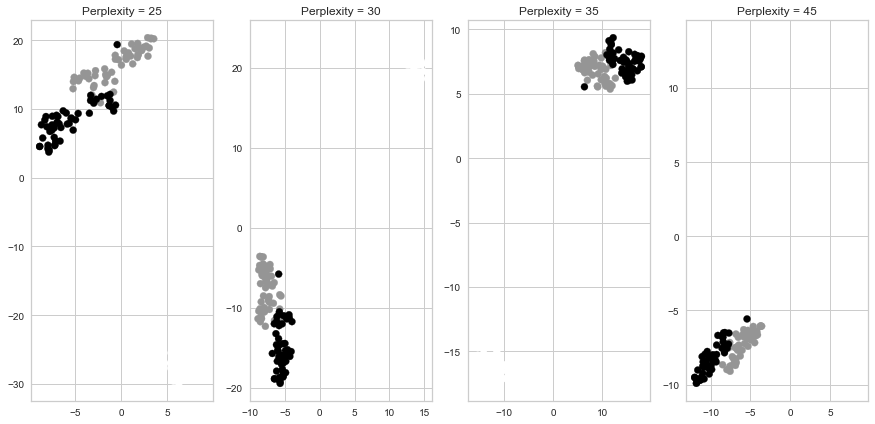

In [66]:
from sklearn.manifold import TSNE

X, y = datasets.load_iris(return_X_y=True)

fig, ax = plt.subplots(1, 4, figsize=(15, 7))
for i, perp in enumerate([25, 30, 35, 45]):
    tsne = TSNE(perplexity=perp)
    x_embedded = tsne.fit_transform(X)
    ax[i].scatter(x_embedded[:, 0], x_embedded[:, 1], c=y)
    ax[i].set_title("Perplexity = {}".format(perp))
    
plt.show()

In [67]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])